<a href="https://colab.research.google.com/github/KacioSilva/ProjetoAM/blob/main/Prova_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação da Disciplina de Aprendizado de Máquina - 1° Unidade;
Equipe: Kácio Silva, Luciano Bruno e Tyago Ferreira.

# Carregando o conjunto de dados usando a biblioteca Pandas

In [12]:
import pandas as pd
import numpy as np

In [13]:
url = 'https://raw.githubusercontent.com/KacioSilva/ProjetoAM/main/parkinsons_updrs.csv'
df = pd.read_csv(url)

#Leitura, análise e tratamento inicial do dataset

In [37]:
df.head(15)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5725,42,61,0,-4.26250,19.725,28.633,0.01533,0.000118,0.00774,0.00800,...,0.908,0.05904,0.05315,0.04576,0.17713,0.132810,11.689,0.70273,0.66975,0.48466
5750,42,61,0,-4.26250,19.725,28.633,0.00615,0.000046,0.00266,0.00291,...,0.316,0.01907,0.02229,0.03109,0.05721,0.014472,21.127,0.49411,0.70068,0.22985
5775,42,61,0,-4.26180,19.725,28.633,0.00626,0.000048,0.00300,0.00274,...,0.200,0.00984,0.01105,0.01820,0.02953,0.033013,24.559,0.47991,0.65597,0.22585
5800,42,61,0,-4.26040,19.725,28.634,0.00529,0.000044,0.00243,0.00275,...,0.225,0.01222,0.01470,0.02119,0.03667,0.030559,21.910,0.52372,0.66131,0.21283
5825,42,61,0,-4.25970,19.725,28.634,0.00402,0.000031,0.00187,0.00196,...,0.219,0.01119,0.01229,0.01779,0.03357,0.016736,23.629,0.54938,0.59106,0.15246
5850,42,61,0,-4.25970,19.725,28.634,0.00352,0.000027,0.00125,0.00169,...,0.159,0.00739,0.00914,0.01465,0.02216,0.009635,24.315,0.58904,0.57961,0.16296
4531,34,59,0,-3.31250,29.291,34.146,0.00441,0.000037,0.00202,0.00239,...,0.178,0.01043,0.01063,0.01850,0.03128,0.031377,19.613,0.66328,0.64633,0.18148
4584,34,59,0,-3.31180,29.291,34.146,0.00388,0.000031,0.00201,0.00183,...,0.200,0.01248,0.01251,0.01869,0.03743,0.019934,22.683,0.47744,0.66811,0.16363
4557,34,59,0,-3.31180,29.291,34.146,0.00225,0.000018,0.00108,0.00139,...,0.126,0.00750,0.00876,0.01388,0.02249,0.004839,24.733,0.54671,0.66910,0.11849
4611,34,59,0,-3.31040,29.291,34.146,0.00617,0.000058,0.00322,0.00328,...,0.217,0.01269,0.01535,0.02694,0.03806,0.030033,18.866,0.69274,0.68188,0.24324


Inicialmente, percebe-se que há colunas que não farão diferenças para o nosso conjunto de dados. Nesse caso, removeremos a coluna Subject#, pois indica somente um identificador do usuário.

In [14]:
df = df.drop('subject#', axis=1)
df.head(15)

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,0.00637,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,0.00773,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


Nesse momento, é interessante visualizar se a base de dados possui valores ausentes para que possam ser tratados. Como é possível visualizar, não é possível encontrar valores ausentes na base de dados.

In [8]:
df.isnull().sum()

age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

É importante também verificar quantos valores únicos possuímos por cada coluna. Esssa etapa é importante pois quanto mais valores únicos por coluna possuirmos, menos satisfatório pode ser o resultado do meu modelo a ser utilizado futuramente.
Feita essa análise, percebe-se que as colunas precisam de tratamento em relação a variedade de valores únicos

In [10]:
df.nunique()

age                23
sex                 2
test_time        2442
motor_UPDRS      1080
total_UPDRS      1129
Jitter(%)        1305
Jitter(Abs)      4105
Jitter:RAP        853
Jitter:PPQ5       840
Jitter:DDP       1703
Shimmer          3581
Shimmer(dB)       852
Shimmer:APQ3     2664
Shimmer:APQ5     2850
Shimmer:APQ11    3283
Shimmer:DDA      4223
NHR              5532
HNR              4780
RPDE             5430
DFA              5282
PPE              4777
dtype: int64

Análise inicial da coluna de IDADE.

Percebe-se que há uma grande variação, e que a maior parte da amostra está entre 60 e 80.

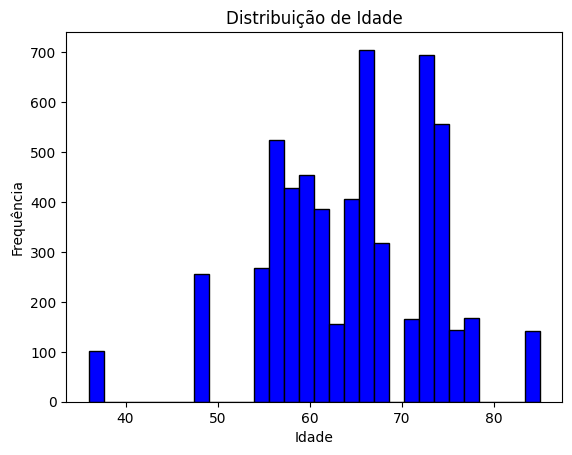

In [33]:
import matplotlib.pyplot as plt

# Suponhamos que você tenha uma coluna 'age' em seu DataFrame
idade = df['age']

plt.hist(idade, bins=30, color='b', edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Análise Inicial da coluna de Sexo.

 Percebe-se que a maioria da minha amostra são de pacientes do sexo MASCULINO.

Text(0.5, 1.0, 'Distribuição do sexo')

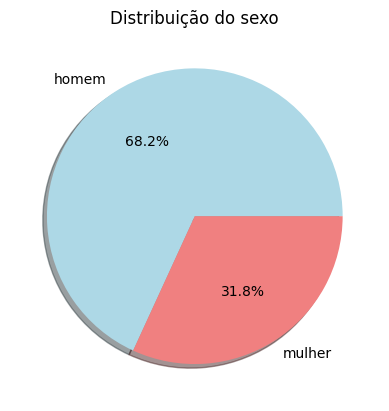

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

colunaSexo = df['sex'].value_counts()
cores = ['lightblue', 'lightcoral']
labels = ['homem', 'mulher']

plt.pie(colunaSexo, colors=cores, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição do sexo')

 Foi notado que eu possuo valores negativos indicando uma quantidade de dias, o que não pode ser utilizado para a análise dos dados. Portanto, removeremos esses dados negativos.

 Foi utilizado o gráfico do tipo boxplot pois ele é ideal para analisar a distribuição de valores na faixa de tempo com um grande volume de informações.

    age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0    72    0     5.6431       28.199       34.398    0.00662     0.000034   
1    72    0    12.6660       28.447       34.894    0.00300     0.000017   
2    72    0    19.6810       28.695       35.389    0.00481     0.000025   
3    72    0    25.6470       28.905       35.810    0.00528     0.000027   
4    72    0    33.6420       29.187       36.375    0.00335     0.000020   
5    72    0    40.6520       29.435       36.870    0.00353     0.000023   
6    72    0    47.6490       29.682       37.363    0.00422     0.000024   
7    72    0    54.6400       29.928       37.857    0.00476     0.000025   
8    72    0    61.6690       30.177       38.353    0.00432     0.000029   
9    72    0    68.6880       30.424       38.849    0.00496     0.000027   
10   72    0    75.6530       30.670       39.340    0.00465     0.000026   
11   72    0    82.6530       30.917       39.834    0.00537     0.000032   

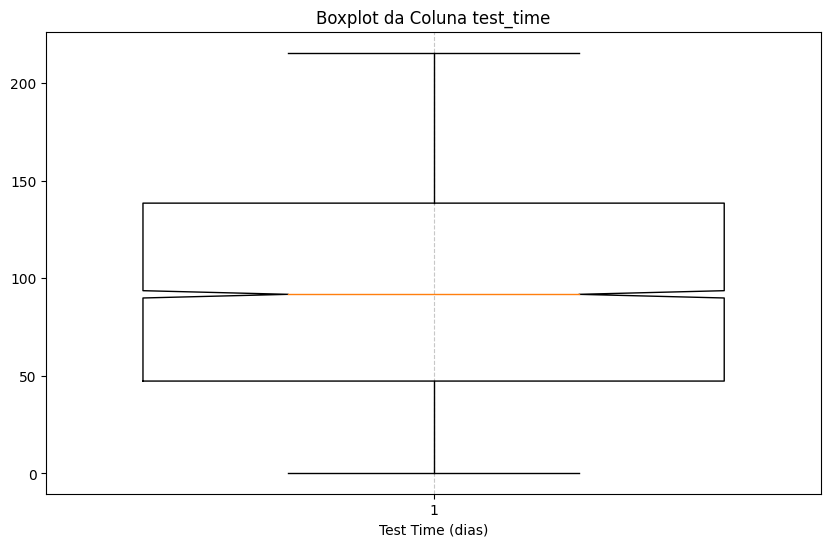

In [17]:
import pandas as pd

# Removendo os valores negativos
df = df[df['test_time'] >= 0]
print(df.head(15))

# Criando um histograma
plt.figure(figsize=(10, 6))
plt.xlabel('Test Time (dias)')
plt.title('Boxplot da Coluna test_time')

plt.boxplot(df['test_time'], sym='gx', widths=.75, notch=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Análise inicial da coluna motor_UPDRS.

Por se tratar de uma coluna que possui diversos valores que indicam uma pontuação e, mais especificamente, valores contínuos, é interessante utilizar o gráfico do tipo histograma para extrair informações sobre os dados: Possíveis outliers, como os dados estão distribuídos e como a distribuição se comporta em torno do valor central.




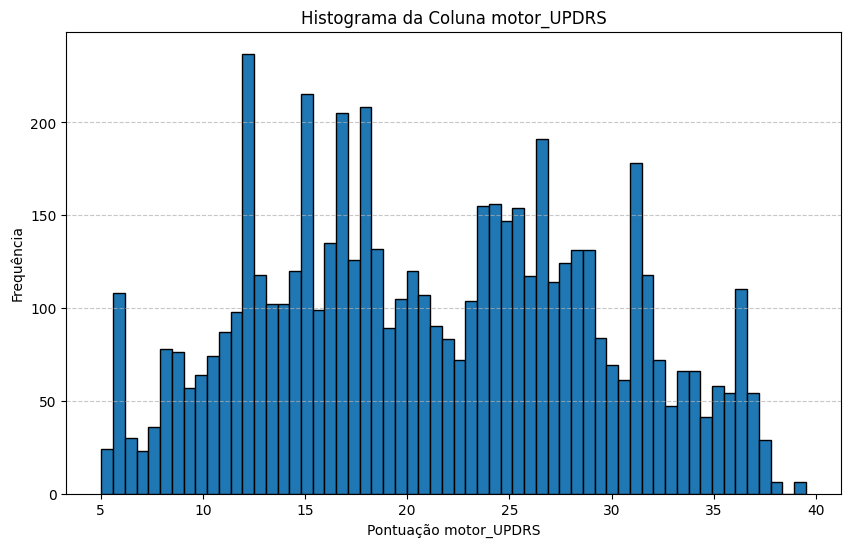

In [97]:
plt.figure(figsize=(10, 6))
plt.hist(df['motor_UPDRS'], bins=60, edgecolor='k')
plt.xlabel('Pontuação motor_UPDRS')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna motor_UPDRS')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()